In [16]:
# Import all the necessary packages.
import pandas as pd
import numpy as np

# Read the provided CSV file/data set.
df = pd.read_csv('../Data/customer_data.csv') 

# Print the output.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Edu            41188 non-null  object 
 2   Comm           41188 non-null  object 
 3   Duration       41188 non-null  int64  
 4   Campaign       41188 non-null  int64  
 5   PosDays        41188 non-null  int64  
 6   Last_out       41188 non-null  object 
 7   Var_rate       41188 non-null  float64
 8   Price_idx      41188 non-null  float64
 9   Conf_idx       41188 non-null  float64
 10  Month_rate     41188 non-null  float64
 11  Quarterly_emp  41188 non-null  float64
 12  Target         41188 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 4.1+ MB
None


,Age,Edu,Comm,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,basic.4y,cellular,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,unknown,cellular,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,university.degree,cellular,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,high.school,cellular,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,basic.4y,cellular,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [17]:
df['Target'].value_counts() 

0    36548
1     4640
Name: Target, dtype: int64

In [18]:
# Specify the DataFrame column, and add/determine the values.
df['Edu'].value_counts() 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: Edu, dtype: int64

In [19]:
# Create two lists: one with initial and one with new values.
intial_vals = ['illiterate', 'unknown', 'basic',
               'high', 'university', 'professional']

new_vals = ['other', 'other', 'pre-school',
            'high-school', 'uni', 'masters']

# Create a for loop to replace the values.
for old_val, new_val in zip(intial_vals, new_vals):
    df.loc[df['Edu'].str.contains(old_val),'Edu' ] = new_val

# Display all the unique values/check changes.
df['Edu'].unique() 

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

In [20]:
# Specify the DataFrame column, and add/determine the values.
df['Edu'].value_counts() 

pre-school     12513
uni            12168
high-school     9515
masters         5243
other           1749
Name: Edu, dtype: int64

In [22]:
#The order of the Edu column is meaningful and the order matters, so apply LabelEncoder to this column. 
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d
import pandas as pd
import numpy as np

# Create a class and write a user-defined function.
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

# Order lists of the values for the Edu column.
Edu_order = ['other', 'pre-school', 'high-school', 'uni', 'masters']

# Create an instance of MyLabelEncoder.
le = MyLabelEncoder()

# Fit the encoder with the ordered values.
le.fit(Edu_order)

# Apply the LabelEncoder to the Edu column in the DataFrame.
df['Edu'] = df['Edu'].apply(lambda x: x if x in Edu_order else 'other')
df['Edu'] = le.transform(df['Edu'])

# View the DataFrame
print(df.head())

   Age  Edu      Comm  Duration  Campaign  PosDays     Last_out  Var_rate  \
0   44    1  cellular       210         1      999  nonexistent       1.4   
1   53    0  cellular       138         1      999  nonexistent      -0.1   
2   28    3  cellular       339         3        6      success      -1.7   
3   39    2  cellular       185         2      999  nonexistent      -1.8   
4   55    1  cellular       137         1        3      success      -2.9   

   Price_idx  Conf_idx  Month_rate  Quarterly_emp  Target  
0     93.444     -36.1       4.963         5228.1       0  
1     93.200     -42.0       4.021         5195.8       0  
2     94.055     -39.8       0.729         4991.6       1  
3     93.075     -47.1       1.405         5099.1       0  
4     92.201     -31.4       0.869         5076.2       1  


In [23]:
# Create dummy variables for 'Comm' column
comm_dummies = pd.get_dummies(df['Comm'], prefix='Comm', drop_first = True)
df = pd.concat([df, comm_dummies.astype(int)], axis=1)

# Create dummy variables for 'Last_out' column
last_out_dummies = pd.get_dummies(df['Last_out'], prefix='Last_out', drop_first = True)

# Join the new columns to the DataFrame.
df = pd.concat([df, last_out_dummies.astype(int)], axis=1)

# Drop the original string columns
df.drop(['Comm', 'Last_out'], axis=1, inplace=True)

# View the updated DataFrame
print(df.head())

   Age  Edu  Duration  Campaign  PosDays  Var_rate  Price_idx  Conf_idx  \
0   44    1       210         1      999       1.4     93.444     -36.1   
1   53    0       138         1      999      -0.1     93.200     -42.0   
2   28    3       339         3        6      -1.7     94.055     -39.8   
3   39    2       185         2      999      -1.8     93.075     -47.1   
4   55    1       137         1        3      -2.9     92.201     -31.4   

   Month_rate  Quarterly_emp  Target  Comm_telephone  Last_out_nonexistent  \
0       4.963         5228.1       0               0                     1   
1       4.021         5195.8       0               0                     1   
2       0.729         4991.6       1               0                     0   
3       1.405         5099.1       0               0                     1   
4       0.869         5076.2       1               0                     0   

   Last_out_success  
0                 0  
1                 0  
2             

In [24]:
# Set the variables.
X = df.drop('Target', axis = 1)
y = df['Target']

# Import the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
  
# Calculate VIF for each feature.
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# View the DataFrame.
vif_data.sort_values('VIF',ascending=True)

,feature,VIF
3,Campaign,1.926684
2,Duration,2.014870
10,Comm_telephone,2.686394
1,Edu,4.900108
12,Last_out_success,10.765626
11,Last_out_nonexistent,11.731718
0,Age,16.313230
5,Var_rate,30.491577
7,Conf_idx,121.607578
8,Month_rate,260.184876


In [25]:
# Drop the columns with VIF > 10 to avoid multicollinearity problems.
X = X.drop(['Last_out_success', 'Last_out_nonexistent', 'Age', 'Var_rate', 'PosDays', 'Conf_idx',
              'Month_rate', 'Price_idx', 'Quarterly_emp'],
             axis = 1)

# View the DataFrame.
print(X.shape)
X.head()

(41188, 4)


,Edu,Duration,Campaign,Comm_telephone
0,1,210,1,0
1,0,138,1,0
2,3,339,3,0
3,2,185,2,0
4,1,137,1,0


In [26]:
# Recalculate VIF after removal of columns.
# VIF dataframe.
vif_data2 = pd.DataFrame()
vif_data2['feature'] = X.columns
  
# Calculate VIF for each feature.
vif_data2['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# View the DataFrame.
vif_data2.sort_values('VIF',ascending=True)

,feature,VIF
3,Comm_telephone,1.425652
2,Campaign,1.667600
1,Duration,1.676029
0,Edu,2.193722


In [27]:
# Determine whether values in a column are balanced.
df['Target'].value_counts()  

0    36548
1     4640
Name: Target, dtype: int64

Text(0.5, 1.0, 'Target Imbalance')

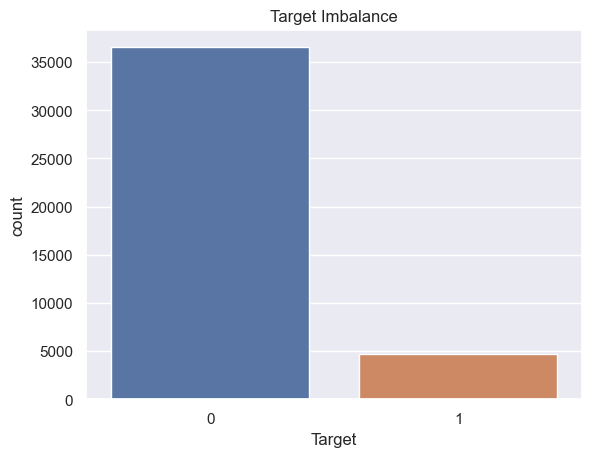

In [28]:
# Create a plot with Seaborn.
import seaborn as sns

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Target', data=df)
ax.set_title('Target Imbalance')

In [29]:
# Handles unbalanced data (scikit-learn needed)
!pip install imblearn  

# Optimised linear, algebra, integrations (scientific)
!pip install scipy  

# Simple tools for predictive data analytics
!pip install scikit-learn  

# Oversampling technique; creates new samples from data
!pip install SMOTE 

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [30]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balance the training data.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 
os_data_y = pd.DataFrame(data = os_data_y, columns = ['Target'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   Edu  Duration  Campaign  Comm_telephone
0    1       162         1               0
1    3        62         1               0
2    3       353         1               0
3    1       420         4               1
4    4       212         2               1


,Target
0,0
1,0
2,1
3,0
4,0


In [31]:
# Determine whether values in a column are balanced by counting the values.
os_data_y['Target'].value_counts()

0    25617
1    25617
Name: Target, dtype: int64

Text(0.5, 1.0, 'New Balanced Target')

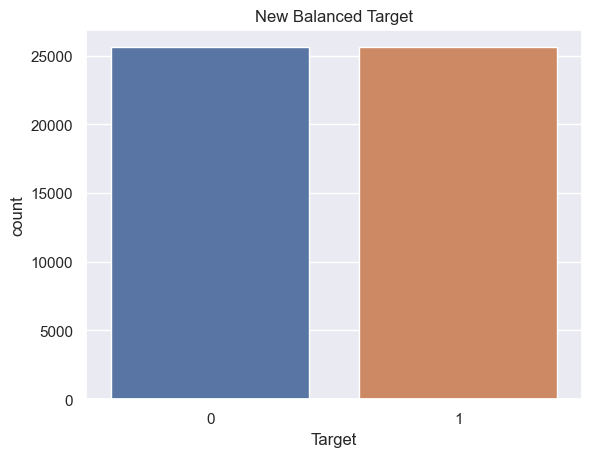

In [32]:
sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Target', data = os_data_y)
ax.set_title("New Balanced Target")

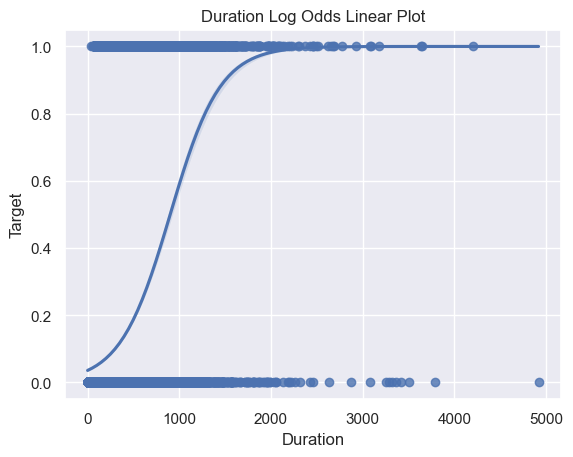

In [33]:
dur = sns.regplot(x = 'Duration',
                  y= 'Target',
                  data= df,
                  logistic= True).set_title("Duration Log Odds Linear Plot")

In [34]:
# Name the new DataFrame, and specify all the columns for BLR.
nec_cols = nec_cols = os_data_X.columns

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['Target']  

# Set the logit() to accept y and X as parameters, and return the logit object.
logit_model=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()  

# Print the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.448386
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                51234
Model:                          Logit   Df Residuals:                    51230
Method:                           MLE   Df Model:                            3
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.3531
Time:                        11:50:20   Log-Likelihood:                -22973.
converged:                       True   LL-Null:                       -35513.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Edu               -0.1724      0.008    -22.758      0.000      -0.187      -0.158
Duration           0.0049   5.24e-05     92.713      0.000       0.005       0.005
Campaign          -0.3994      0.008    -47.592      0.000      -0.416      -0.383
Comm_telephone    -2.7292      0.039    -70.483      0.000      -2.805      -2.653
==================================================================================
"""

In [35]:
# Import the necessary packages.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Set LogisticRegression() to logreg.
logreg = LogisticRegression(max_iter=1000) 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(os_data_X, os_data_y.values.ravel()) 

LogisticRegression(max_iter=1000)

In [36]:
# Determine BLR model's accuracy.
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(acc))

Accuracy of logistic regression classifier on test set: 0.79


<AxesSubplot:>

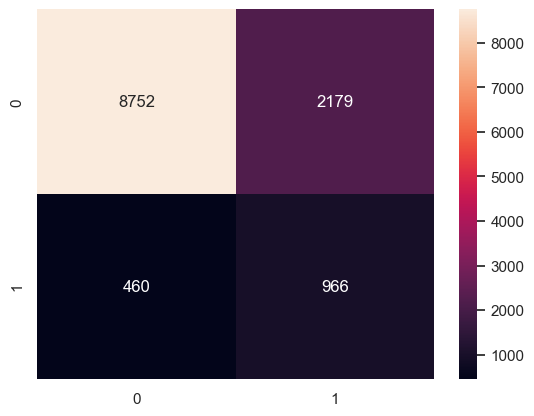

In [37]:
# Create the confusion matrix to test classification accuracy in BLR.
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [38]:
# Create a DataFrame to display the confusion matrix. 
pd.DataFrame(confusion_matrix, index=['observed_notchurn','observed_churn'],
columns=['predicted_notchurn', 'predicted_churn'])

,predicted_notchurn,predicted_churn
observed_notchurn,8752,2179
observed_churn,460,966


In [42]:
# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     10931
           1       0.31      0.68      0.42      1426

    accuracy                           0.79     12357
   macro avg       0.63      0.74      0.65     12357
weighted avg       0.88      0.79      0.82     12357

